# Housing Prices Competition for Kaggle
## Φώτιος Κούτσικος
**Στόχος:** Πρόβλεψη τιμών κατοικιών με μηχανική μάθηση (Kaggle Competition)  
**Μέθοδος:**  
- Exploratory Data Analysis (EDA)  
- Feature Engineering  
- Ensemble Models (XGBoost, Random Forest)  
**Αποτέλεσμα:**  
- **Kaggle Score (RMSE): 16,108.56** (Top 10% leaderboard) 

### 1. Εισαγωγή Χρήσιμων Βιβλιοθηκών

Οι βιβλιοθήκες αυτές είναι χρήσιμες για την εισαγωγή και την αναπαράσταση των δεδομένων.

In [59]:
# Import useful libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


### 2. Φόρτωση και Εξέταση των Δεδομένων

Τα δεδομένα μπορούν να προστεθούν στο notebook με την ακολουθία των εξής βημάτων:
* More options for this notebook (κουμπί με τρεις τελείες πάνω δεξιά)
* Input / Add Input
* Housing Prices Competition for Kaggle

Μετά από αυτά τα βήματα, τα δεδομένα θα είναι έτοιμα για φόρτωση

In [60]:
path = '/kaggle/input/home-data-for-ml-course'

train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

print("Data Loaded Successfully!")

Data Loaded Successfully!


Ας εξετάσουμε περαιτέρω τα εν λόγω δεδομένα, πρώτα με τη δομή τους.

In [61]:
print(f"Training Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Training Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


Όπως βλέπουμε, τα δεδομένα μας είναι πίνακες τιμών, με 1460 καταγραφές σπιτιών, κάθε ένα με 80 (για το test set) ή 81 στήλες (για το training set) που αντιστοιχούν σε χαρακτηριστικά - features του συγκεκριμένου σπιτιού.

Ας εξετάσουμε περαιτέρω τις πληροφορίες κάθε τιμής

In [62]:
print(f"Training Data Info:")
display(train.info())

print(f"Test Data Info:")
display(test.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64

None

Παρατηρούμε ότι υπάρχουν κατηγορίες που λαμβάνουν  αριθμητικές (numerical) τιμές (τύπου int64, float64) και άλλες με κατηγορικές (categorical) τιμές (τύπου object). Αυτή είναι σημαντική διάκριση και θα τη χρειαστούμε στη συνέχεια.

Η περιγραφή των δεδομέων του training set μαζί με ένα απόσπασμα τους:

In [63]:
print("\nTraining Data Description:")
display(train.describe())

print("\nFirst 5 rows of Training Data:")
display(train.head())


Training Data Description:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



First 5 rows of Training Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Και η περιγραφή των δεδομέων του test set μαζί με ένα απόσπασμα τους:

In [64]:
print("\nTest Data Description:")
display(train.describe())

print("\nFirst 5 rows of Test Data:")
test.head()


Test Data Description:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



First 5 rows of Test Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Παρατηρούμε ότι αρκετές στήλες λαμβάνουν τιμή NaN και είναι δηλαδή, κενές. Ας αναγνωρίσουμε ποιές στήλες έχουν τις περισσότερες κενές τιμές. 


Missing Values in Training Data:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

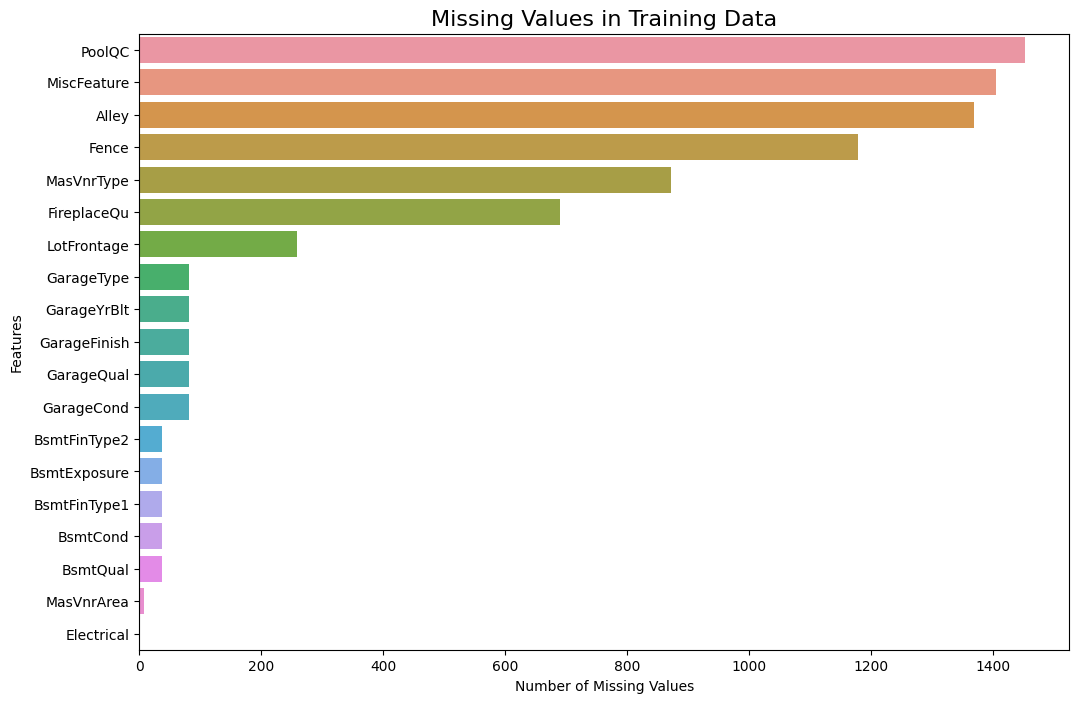

In [65]:
# Check missing values for Training data
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

print("\nMissing Values in Training Data:")
display(missing_train)

# Visualizing missing values (train data)
plt.figure(figsize=(12,8))
sns.barplot(y=missing_train.index, x=missing_train.values)
plt.title('Missing Values in Training Data', fontsize=16)
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()


Missing Values in Test Data:


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

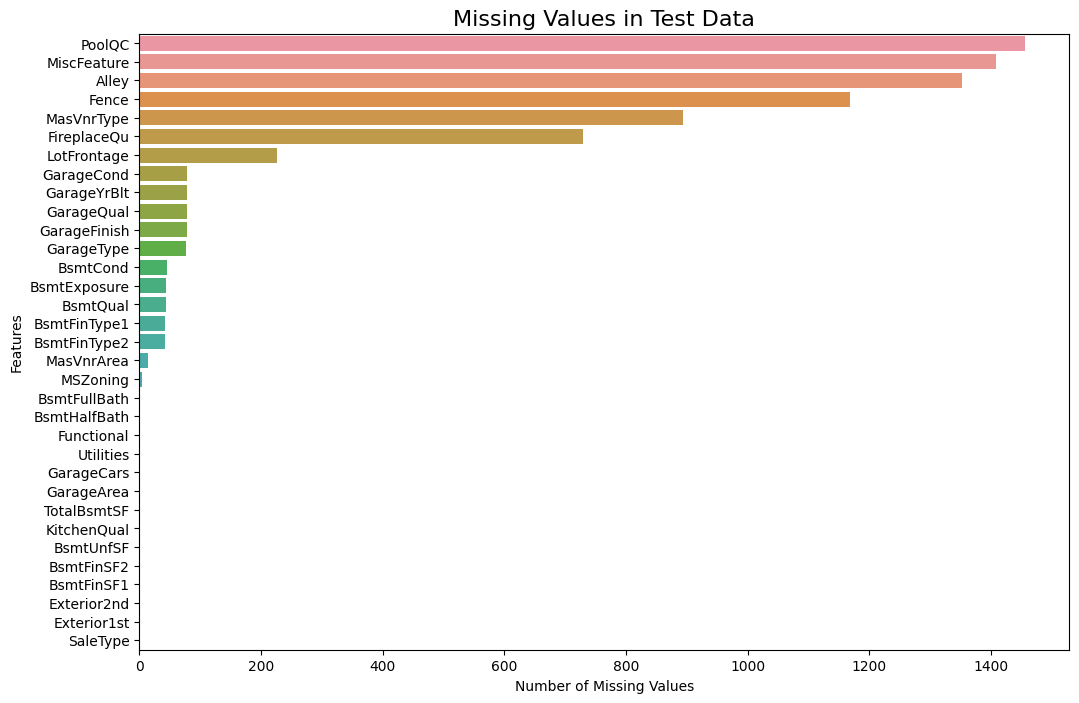

In [66]:
# Check missing values for Test data
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

print("\nMissing Values in Test Data:")
display(missing_test)

# Visualizing missing values (test data)
plt.figure(figsize=(12,8))
sns.barplot(y=missing_test.index, x=missing_test.values)
plt.title('Missing Values in Test Data', fontsize=16)
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()

Αυτή η πληροφορία για τις ελλείψεις σε τιμές είναι χρήσιμη διότι μας ενημερώνει σχετικά με το ποιά χαρακτηριστικά είναι "σπανιότερα" στα σπίτια που εξετάζουμε. Επομένως, μπορεί να διαδραματίσουν σημαντικό ρόλο στην τιμή του συγκεκριμένου σπιτιού. 
Βπίσης αξιοσημείωτο είναι το πόσο διαφορετικά είναι τα σπίτια στο training set σε σχέση με το test set. Συγκεκριμένα, τα δεδομένα στο test set έχουν μεγαλύτερη ποικιλία ελλείψεων σε σχέση με το trainig set, κάτι που ίσως σηματοδοτήσει μία μικρή διαφοροποίηση στα αποτελέσματα.

Στη συνέχεια εξετάζουμε την κατανομή των τιμών των σπιτιών και παρατηρούμε ότι ακολουθεί κανονική κατανομή με μέση τιμή ~138.000. Η κατανομή παρουσιάζει ασυμμετρία με θετική λοξότητα (skewness), δηλαδή συγκέντρωση των τιμών προς το χαμηλό άκρο (τα πιο οικονομικά σπίτια), γεγονός λογικό και αντιπροσωπευτικό της πραγματικότητας.

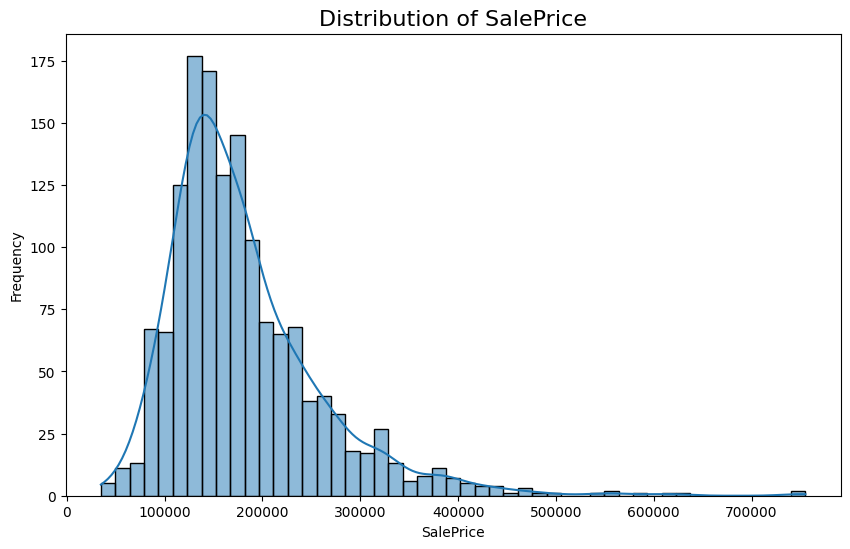

In [67]:
# SalePrice Distribution
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

Τώρα, θα ελέγξουμε την συσχέτιση (correlation) των features με την τιμή και θα αναπαραστήσουμε τις 15 υψηλότερες.

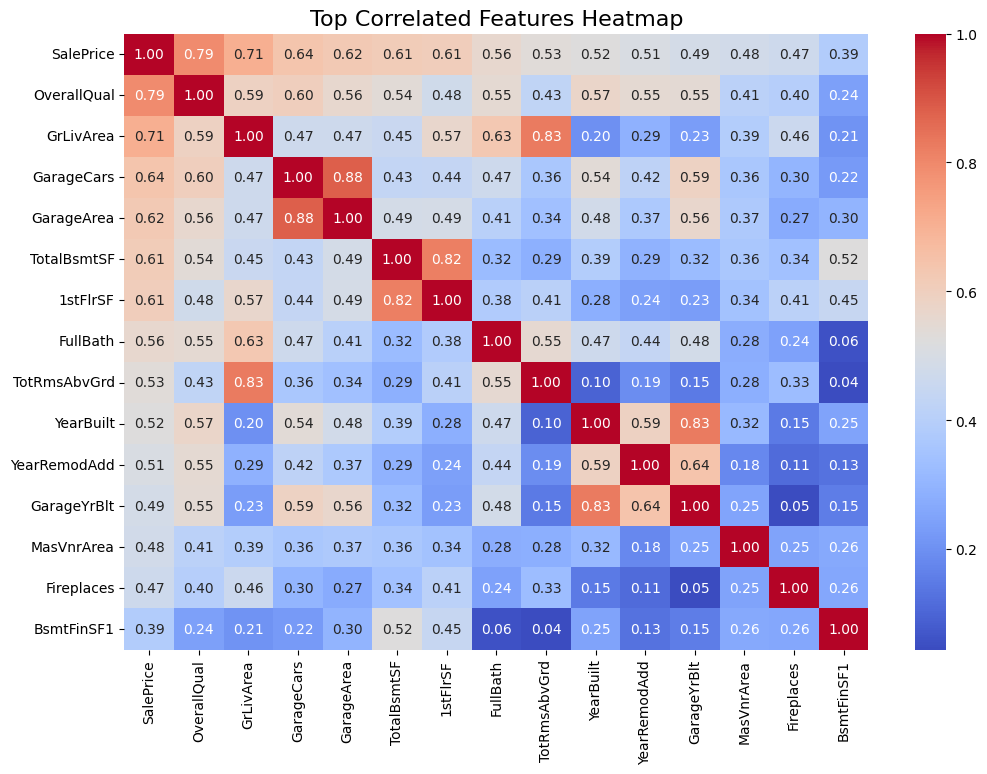

In [68]:
# Select Numerical Features for Correlation Matrix
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numerical_features].corr()

# Select the Top 15 correlated numeric features with SalePrice
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features Heatmap', fontsize=16)
plt.show()

Όπως γίνεται αντιληπτό, η *ποιότητα* του σπιτιού (OveralQual) και η *ολική επιφάνεια* (GrLivArea) είναι οι κύριοι παράγοντες τιμολόγησης.

Για τις κορυφαίες συσχετίσεις με το SalePrice θα δημιιουργήσουμε scatter plots προκειμένου να:
* Επαληθεύσουμε γραμμικές σχέσεις
* Αναγνωρίσουμε εμπειρικούς κανόνες (π.χ. 'υψηλή ποιότητα = υψηλή τιμή')
* Εντοπίσουμε outliers (π.χ. μεγάλα σπίτια με χαμηλή τιμή)"

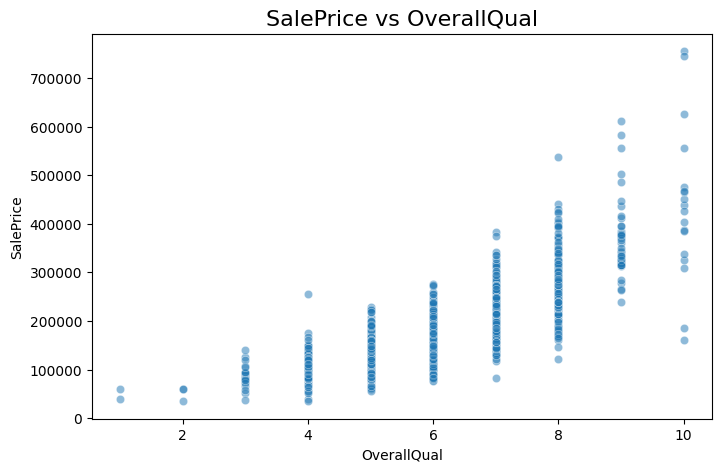

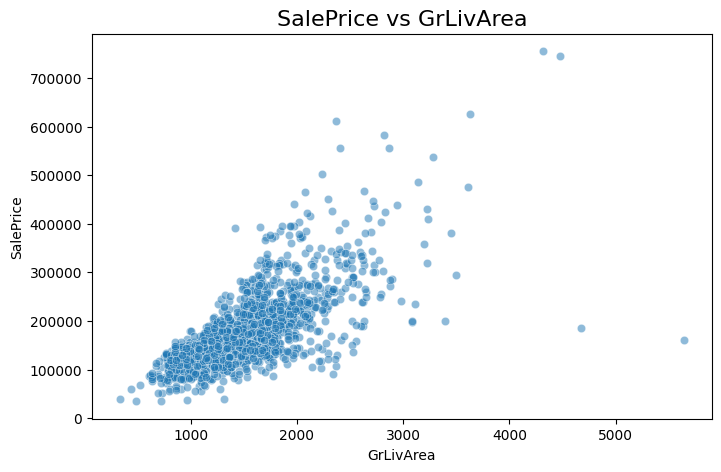

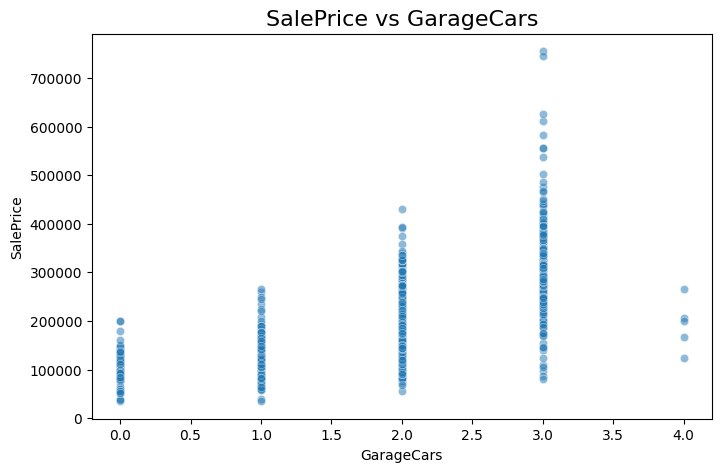

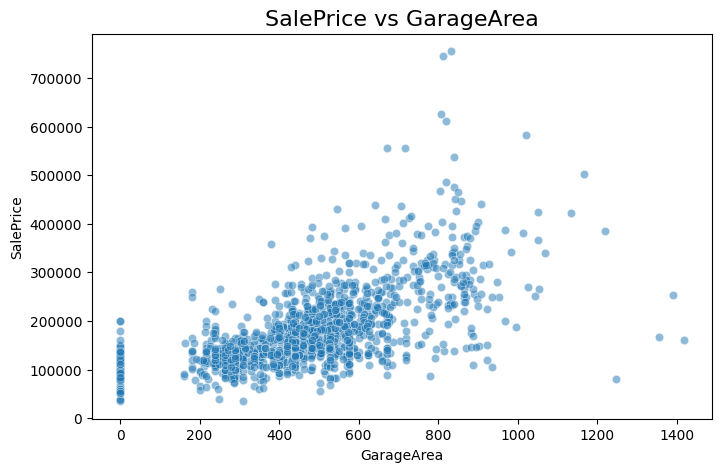

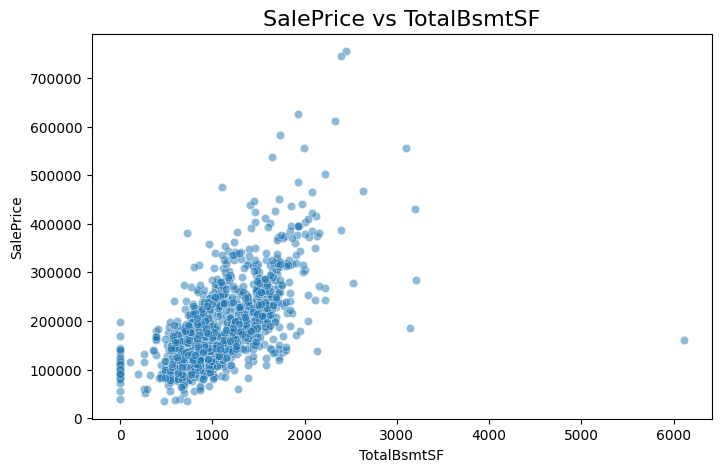

In [69]:
corr_num_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

for feature in corr_num_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=train[feature], y=train['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### 3. Εκπαίδευση Μοντέλων

Εφόσον είναι όλα έτοιμα, ξεκινάμε με την προεπεξεργασία των δεδομένων, καθώς υπάρχουν categorical data. Αυτό είναι πρόβλημα που πρέπει να αντιμετωπιστεί, διότι τα περισσότερα μοντέλα λειτουργούν με αριθμητικές τιμές, καθώς δεν είναι δυνατό να ερμηνευτούν ετικέτες και η σύγκριση μεταξύ τους δεν υφίσταται. 

In [70]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include="object"):
        df[col] = df[col].fillna("None")
        df[col] = LabelEncoder().fit_transform(df[col])
    for col in df.select_dtypes(include=["int64", "float64"]):
        df[col] = df[col].fillna(df[col].median())
    return df

Στη συγκεκριμένη άσκηση, προκειμένου να εξασφαλίσουμε την βέλτιστη απόδοση, θα χρησιμοποιήσουμε τρία διαφορετικά μοντέλα: **HistogramGradientBoosting Regressor**, **XGBoost Regressor** και **LightGBM Regressor**.

In [90]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

test_id = test["Id"]

y = train.SalePrice

X = preprocess(train.drop(["Id", "SalePrice"], axis=1))

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

hgb_model = HistGradientBoostingRegressor(learning_rate=0.1, random_state=1)
hgb_model.fit(train_X, train_y)
hgb_val_predictions = hgb_model.predict(val_X)
hgb_val_mae = mean_absolute_error(hgb_val_predictions, val_y)
hgb_val_mse = mean_squared_error(val_y, hgb_val_predictions,squared=False)

print("Validation MAE for HistogramGradientBoost Model: {:,.0f}".format(hgb_val_mae))
print("Validation MSE for HistogramGradientBoost Model: {:,.0f}".format(hgb_val_mse))

Validation MAE for HistogramGradientBoost Model: 15,572
Validation MSE for HistogramGradientBoost Model: 26,534


In [114]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=1) 
xgb_model.fit(train_X, train_y)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(xgb_val_predictions, val_y)
xgb_val_mse = mean_squared_error(val_y, xgb_val_predictions,squared=False)

print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))
print("Validation MSE for XGBoost Model: {:,.0f}".format(xgb_val_mse))

Validation MAE for XGBoost Model: 15,469
Validation MSE for XGBoost Model: 26,033


In [128]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=55, learning_rate=0.1, random_state=1)
lgb_model.fit(train_X, train_y)
lgb_val_predictions = lgb_model.predict(val_X)
lgb_val_mae = mean_absolute_error(lgb_val_predictions, val_y)
lgb_val_mse = mean_squared_error(val_y, lgb_val_predictions,squared=False)

print("Validation MAE for LightGBM Model: {:,.0f}".format(lgb_val_mae))
print("Validation MSE for LightGBM Model: {:,.0f}".format(lgb_val_mse))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 71
[LightGBM] [Info] Start training from score 182319.757078
Validation MAE for LightGBM Model: 15,120
Validation MSE for LightGBM Model: 26,326


Εύκολα γίνεται κατανοητό ότι το μοντέλο με την καλύτερη απόδοση είναι το **LightGBM Regressor** με MAE στο validation set 15.120. Επομένως, θα χρησιμοποιήσουμε αυτό για το prediction, προκειμένου να λάβουμε τα καλύτερα αποτελέσματα.

In [74]:
test_X = preprocess(test.drop("Id", axis=1))

test_preds = lgb_model.predict(test_X)

*Σημείωση*: Το γεγονός ότι το LightGBM Regressor μοντέλο απέδωσε καλύτερα στο validation set δεν συνεπάγεται απαραίτητα ότι θα έχει την καλύτερη επίδοση από τα τρία στο test set, καθώς υπάρχει το ενδεχόμενο overfitting και δηλαδή το μοντέλο να εκπαιδευτεί "υπερβολικά καλά" στο training set με αποτέλεσμα να μην αποδίδει καλα εκτός αυτού. Για λόγους απλότητας της άσκησης απογεύγουμε να ασχοληθούμε με αυτό το θέμα. Έτσι κι αλλιώς, η αποδοση του μοντέλου στο test set με αποτέλεσμα 16.108 είναι αρκετά κοντά στην MAE τιμή που υπολογίστηκε στο validation set, κάτι που υποδεινύει ότι δεν υπάρχει κίνδυνος overfitting.

In [75]:
# Code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *


step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [76]:
# Submission file
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
print("🚀 submission.csv has been created.")

🚀 submission.csv has been created.


### 4. Συμπεράσματα

Η παρούσα εργασία έχει στόχο την εξοικείωση με τα μοντέλα, την εκπαίδευσή τους και τους παράγοντες που μπορούν να επηρεάσουν την απόδοση των αποτελεσμάτων. Οι προβλέψεις **16.108** είναι ικανοποιητικές, καθώς όπως είδαμε παραπάνω, η μέση τιμή των σπιτιών είναι ~138.000 και αυτό σημαίνει ότι το σφάλμα είναι της τάξης του **10%**.